# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dados = pd.read_csv('demo_processado.csv')
X = dados.drop('mau', axis=1)
y = dados['mau']
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

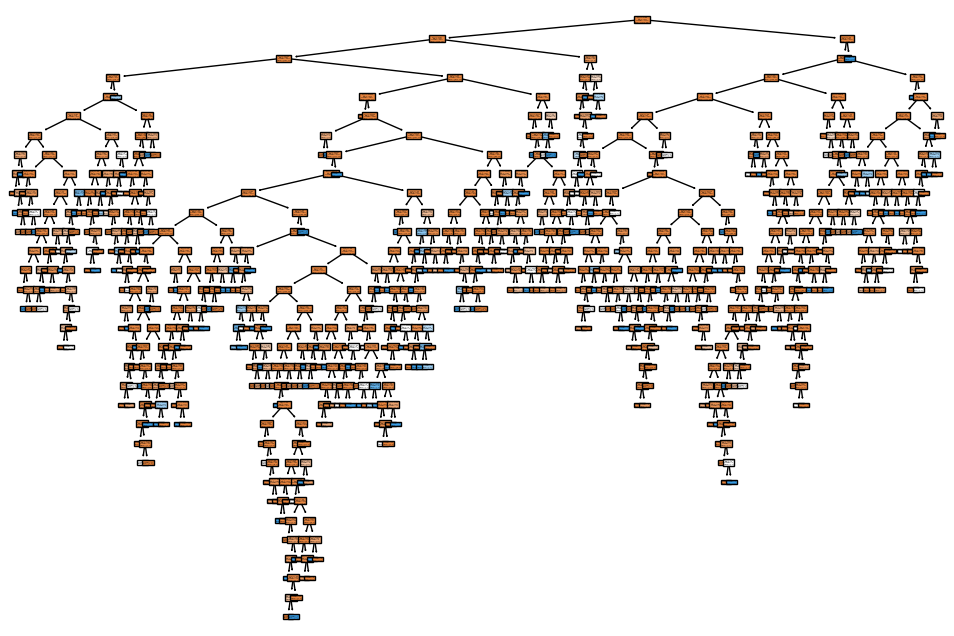

Matriz de Confusão (Treinamento):
[[11357    16]
 [   86   196]]
Acurácia (Treinamento): 0.9912483912483913


In [2]:
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_treino, y_treino)

plt.figure(figsize=(12, 8))
plot_tree(modelo, filled=True)
plt.show()

prev_treino = modelo.predict(X_treino)
acuracia_treino = accuracy_score(y_treino, prev_treino)
confusao_treino = confusion_matrix(y_treino, prev_treino)

print("Matriz de Confusão (Treinamento):")
print(confusao_treino)
print("Acurácia (Treinamento):", acuracia_treino)


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [3]:
prev_teste = modelo.predict(X_teste)

print("Previsões na base de teste:")
print(prev_teste)


Previsões na base de teste:
[False False False ...  True False False]


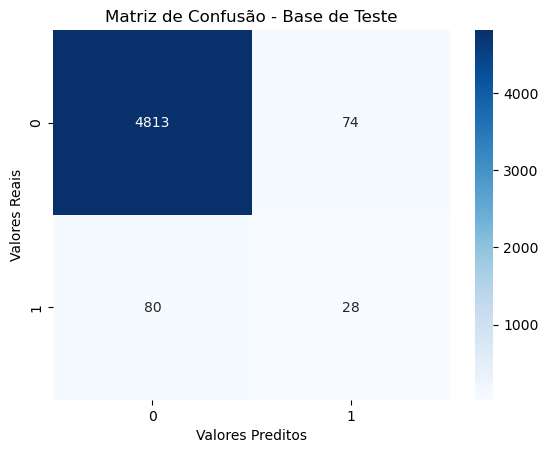

In [4]:
matriz_confusao_teste = confusion_matrix(y_teste, prev_teste)

sns.heatmap(matriz_confusao_teste, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão - Base de Teste')
plt.show()


In [5]:
acuracia_teste = accuracy_score(y_teste, prev_teste)

print("Acurácia na base de teste:", acuracia_teste)
print("Acurácia na base de treinamento:", acuracia_treino)

Acurácia na base de teste: 0.9691691691691692
Acurácia na base de treinamento: 0.9912483912483913


In [6]:
novo_modelo = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
novo_modelo.fit(X_treino, y_treino)

prev_novo_modelo = novo_modelo.predict(X_teste)
matriz_confusao_novo_modelo = confusion_matrix(y_teste, prev_novo_modelo)
print("Matriz de Confusão do Novo Modelo:")
print(matriz_confusao_novo_modelo)

proporcao_maus = sum(prev_novo_modelo) / len(prev_novo_modelo)
print("Proporção de proponentes classificados como 'maus':", proporcao_maus)


Matriz de Confusão do Novo Modelo:
[[4863   24]
 [ 100    8]]
Proporção de proponentes classificados como 'maus': 0.006406406406406407


In [7]:
quantidade_bons = sum(1 for label in y_teste if label == 'bons')

acuracia_todos_bons = quantidade_bons / len(y_teste)
print("Acurácia se todos fossem classificados como 'bons':", acuracia_todos_bons)


Acurácia se todos fossem classificados como 'bons': 0.0
